**Avocado Analysis**

This is looking at the Avocado Prices data set on Kaggle (https://www.kaggle.com/neuromusic/avocado-prices). This is primarily exploratory data analysis with some basic statistical tests (e.g. test of normality).

In [147]:
import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns; import numpy as np

In [35]:
data = pd.read_csv('avocado.csv',index_col='Date')

In [36]:
data.head(10)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
2015-11-22,5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
2015-11-15,6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
2015-11-08,7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
2015-11-01,8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany


In [37]:
len(data['year'].unique())

4

In [38]:
dates = list(data.index.unique())
dates.sort()

**Analysis of price averaged over geographical area**

In [39]:
price_series = pd.DataFrame(index=dates,columns=['conventional','organic'])

for i in dates:
    price_series.loc[i,'conventional'] = data[data['type']=='conventional'].loc[i,'AveragePrice'].mean()
for i in dates:
    price_series.loc[i,'organic'] = data[data['type']=='organic'].loc[i,'AveragePrice'].mean()

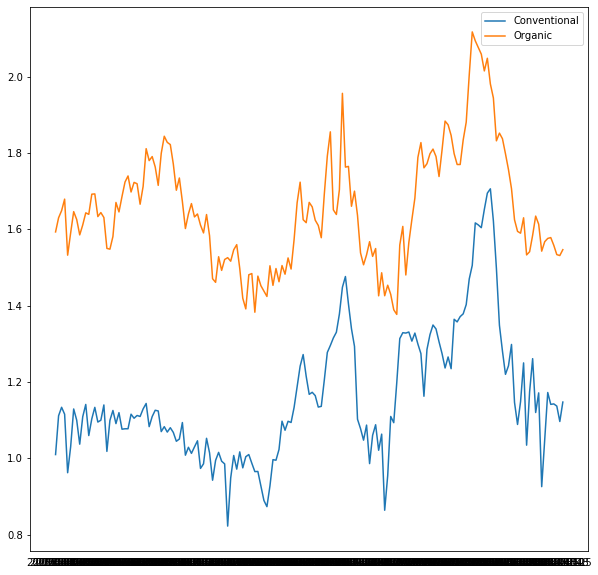

In [40]:
plt.figure(figsize=(10,10))
plt.plot(price_series.index, price_series)
plt.tick_params(bottom=False)
plt.legend(['Conventional','Organic'])

Text(0.5, 1.0, 'Empirical Price Returns distribution')

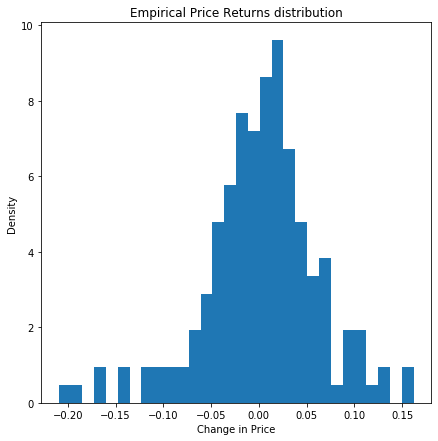

In [120]:
conv_price_changes = price_series['conventional'].pct_change().dropna()

plt.figure(figsize=(7,7))
plt.hist(conv_price_changes,density=True,bins=30)
plt.xlabel('Change in Price')
plt.ylabel('Density')
plt.title('Empirical Price Returns distribution')

In [18]:
# Test normality of price returns for avocado using Shapiro-wilks test

from scipy.stats import shapiro
from scipy.stats import kurtosis, skewtest, skew

print(
    'P-value for Shapiro-Wilks test of normality of Price Series delta:', shapiro(conv_price_changes)[1]
)

P-value for Shapiro-Wilks test of normality of Price Series delta: 0.0007566744461655617


P-value is below all the usual choices of thresholds (0.05, 0.01 and 0.001) therefore we can conclude that this tests suggests a non-normal underlying distribution.

In [184]:
# Will observe the kurtosis ('fatness' of tails) and test whether the skew (whether positive or negative) deviates
# from the skewness of a normal distribution i.e. skewness = 0.

print(
    'Kurtosis:', kurtosis(conv_price_changes), 'Skewness test p-value:', skewtest(conv_price_changes)[1]
)

print('Skew value:', skew(conv_price_changes))

Kurtosis: 1.4638944692975233 Skewness test p-value: 0.009122830258219567
Skew value: -0.4972687001743107


Kurtosis of 1.464 indicates fatter tails and a higher peak (density around the mean is higher) this means we see more values in the extremes (tails) of the distribution than expected with a normal distribution. 

Again, the p-value of our test is below all thresholds therefore we can reject the null that the skewness equals the skewness of a normal distribution. The actual skewness value was shown to be -0.5. A negative skew suggests longer left tails (more extreme negative values) and hence the median is greater than the mean. 

In [79]:
volume_series = pd.DataFrame(index=dates,columns=['conventional','organic'])

for i in dates:
    volume_series.loc[i,'conventional'] = round(data[data['type']=='conventional'].loc[i,'Total Volume'].mean())
for i in dates:
    volume_series.loc[i,'organic'] = round(data[data['type']=='organic'].loc[i,'Total Volume'].mean())
    

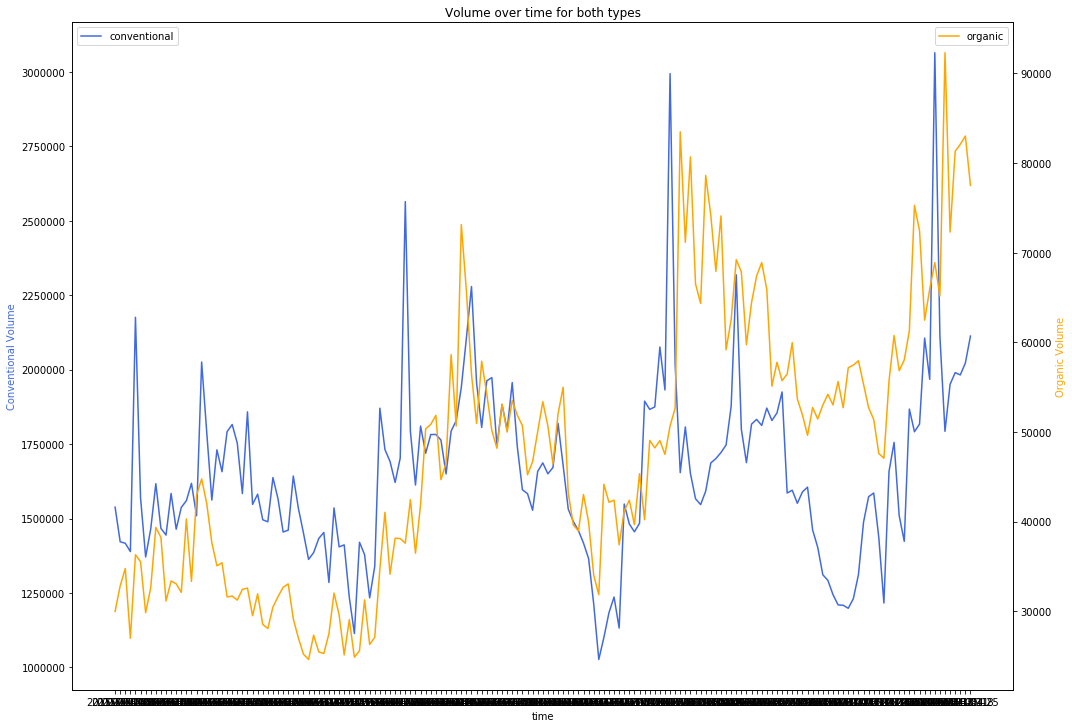

In [118]:
# Volume plot will need 2 axes since the scales of the values is very different for each type 

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.set_xlabel('time')
ax1.set_ylabel('Conventional Volume', color='royalblue')
ax1.plot(volume_series.index, volume_series['conventional'], color='royalblue')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Organic Volume', color='orange')  # we already handled the x-label with ax1
ax2.plot(volume_series.index, volume_series['organic'], color='orange')


fig.tight_layout() 
plt.title('Volume over time for both types')
ax1.legend(['conventional'],loc='upper left')
ax2.legend(['organic'],loc='upper right')
plt.show()

We can observe a general **upward trend** over the course of ~3 years for the volumes bought for both conventional and organic increased however there is clear **seasonality** in the time series plots as we observe these peaks and troughs over time.

Can we infer a relationship between changes in volume and changes in price? Is there a causal relationship such as higher volume leading to higher prices? 

Seeing as the patterns in the behaviour are seen in both types of avocado I will compare the relationship only between price and volume for **conventional** type Avocados only since the results will in all probability generalise to organic.

In [137]:
conventional_avo = pd.concat([price_series['conventional'],volume_series['conventional']],axis=1)
conventional_avo.columns = ['Price','Volume']
conventional_avo.head()

,Price,Volume
2015-01-04,1.00963,1538052
2015-01-11,1.1113,1421895
2015-01-18,1.13352,1416863
2015-01-25,1.11537,1389043
2015-02-01,0.962037,2175782


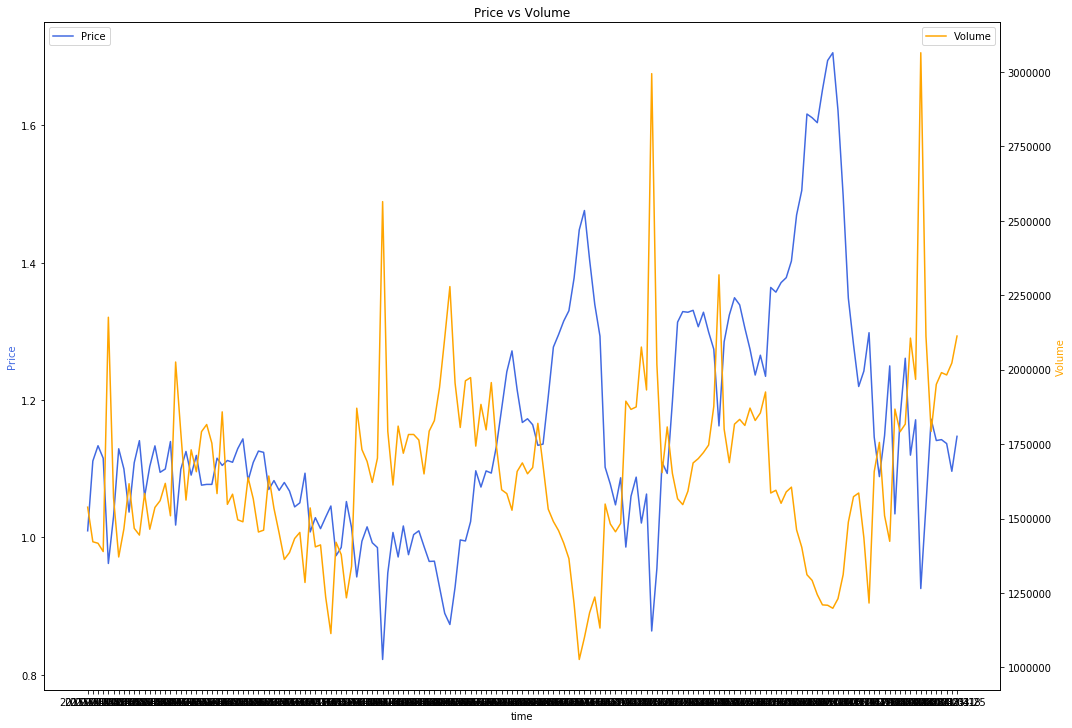

In [139]:
# Price vs volume plot 

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.set_xlabel('time')
ax1.set_ylabel('Price', color='royalblue')
ax1.plot(dates, conventional_avo['Price'], color='royalblue')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Volume', color='orange')  # we already handled the x-label with ax1
ax2.plot(dates, conventional_avo['Volume'], color='orange')


fig.tight_layout() 
plt.title('Price vs Volume')
ax1.legend(['Price'],loc='upper left')
ax2.legend(['Volume'],loc='upper right')
plt.show()

This plot shows that there appears to be a inverse, or negatively correlated, relationship between price and volume with the peaks in volume corresponding to troughs in price and vice versa. To me, this suggests a causal relationship with price dictating volume. 

In [164]:
conventional_avo.corr()

,Volume
Volume,1.0


Using .corr() gave me a different result to what I expect therefore I decided to check the data types:

In [153]:
conventional_avo.dtypes

Price     object
Volume     int64
dtype: object

We have 2 different dtypes therefore I will cast the whole dataframe to float32 since the prices are given to multiple decimal places and can't be casted to int64 like the volume:

In [171]:
print(
    'Correlation coefficient between price and volume:', conventional_avo['Volume'].astype(float).corr(conventional_avo['Price'].astype(float))
)

Correlation coefficient between price and volume: -0.5008748129368501


We observe a correlation coefficient between price and volume of -0.5 which is not isignificant but neither is it necessarily strong. However, this is the correlation simply between price and volume - it may be more relevant to compare the correlation between changes in price and changes in volume. This is a commonly used principle in quantitative finance where when performing correlation analysis you will use asset returns rather than prices due to asset price time series not being stationary and not having finite variance among other reasons.

In [175]:
conv_avo_delta = conventional_avo.pct_change().dropna()

conv_avo_delta.head()

,Price,Volume
2015-01-11,0.100697,-0.075522
2015-01-18,0.019997,-0.003539
2015-01-25,-0.016010,-0.019635
2015-02-01,-0.137473,0.566389
2015-02-08,0.071030,-0.278658


We may as well observe the distribution of the changes in volume like with price previously:

Text(0.5, 1.0, 'Empirical Volume Changes Distributi0n')

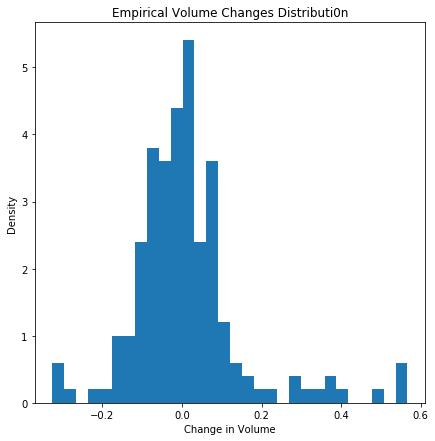

In [183]:
plt.figure(figsize=(7,7))
plt.hist(conv_avo_delta['Volume'],density=True,bins=30)
plt.xlabel('Change in Volume')
plt.ylabel('Density')
plt.title('Empirical Volume Changes Distributi0n')

This distribution doesn't look very normal - we have a very high peak in the distribution with a long right tail - a positive skew. 

Back to comparing the correlation between price and volume changes:

In [185]:
print(
    'Correlation coefficient between price and volume changes:', conv_avo_delta['Volume'].astype(float).corr(conv_avo_delta['Price'].astype(float))
)

Correlation coefficient between price and volume changes: -0.8555222890203532


This time we see a significantly stronger negative correlation. This suggests that a decrease in the price of avocados will lead to increases in volume (demand) - which is a simple economic principle of supply and demand. The relationship also holds the other way round too, naturally.  

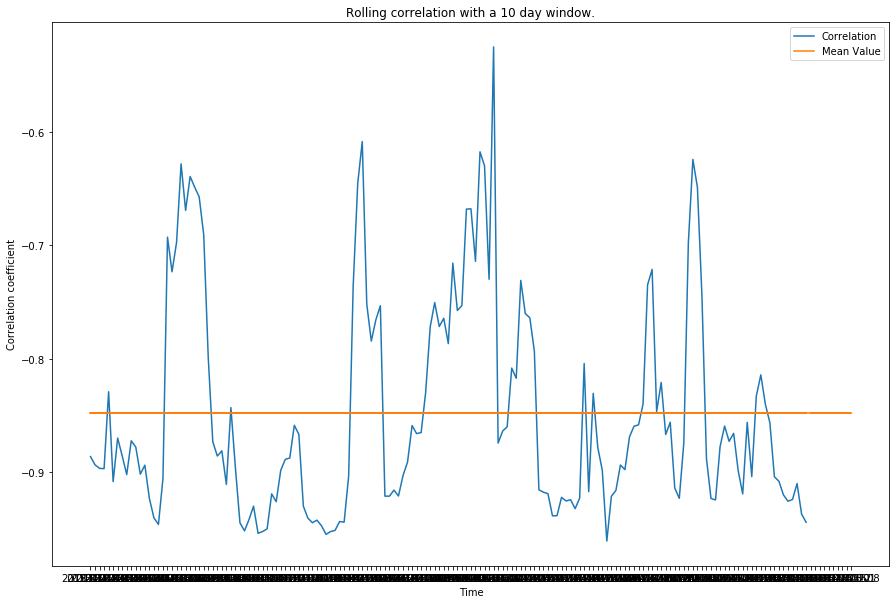

In [201]:
# Lets plot the rolling correlation - correlation coefficient over time:

rolling_cor = conv_avo_delta['Volume'].astype(float).rolling(window=10).corr(conv_avo_delta['Price'].astype(float)).dropna()


plt.figure(figsize=(15,10))
plt.plot(rolling_cor)
plt.xlabel('Time')
plt.ylabel('Correlation coefficient')
plt.title('Rolling correlation with a 10 day window.')
plt.plot(dates,[rolling_cor.mean()] * len(dates))
plt.legend(['Correlation','Mean Value'])


Observing differences in prices and volume based on region - averaged across the entire time period. 

In [231]:
regional_values = pd.DataFrame(index=data['region'].unique())

for i in regional_values.index:
    regional_values.loc[i,'Price'] = data[data['region']==i]['AveragePrice'].mean()
    regional_values.loc[i,'Volume'] = data[data['region']==i]['Total Volume'].mean()
    regional_values.loc[i,'Price Variation as a % of average price'] = ((data[data['region']==i]['AveragePrice'].std())/data[data['region']==i]['AveragePrice'].mean())*100

In [232]:
regional_values

,Price,Volume,Price Variation as a % of average price
Albany,1.561036,4.753787e+04,18.704611
Atlanta,1.337959,2.621453e+05,29.769020
BaltimoreWashington,1.534231,3.985619e+05,19.516490
Boise,1.348136,4.264257e+04,33.966260
Boston,1.530888,2.877929e+05,21.430303
BuffaloRochester,1.516834,6.793630e+04,18.087804
California,1.395325,3.044324e+06,27.989407
Charlotte,1.606036,1.051939e+05,25.808411
Chicago,1.556775,3.955690e+05,21.547035
CincinnatiDayton,1.209201,1.317219e+05,29.054034


This is a bar chart representing the average price across the time period across all the regions. We see some variation with the lowest average price looking to be around 1 dollar while the highest is just over 1 dollar 75.

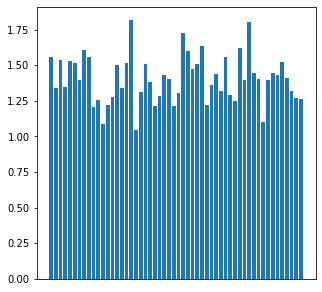

In [235]:
plt.figure(figsize=(5,5))
plt.bar(regional_values.index,regional_values['Price'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)



In [222]:
# Regional values with the highest average price for the periods

regional_values['Price'].sort_values(ascending=False)[:10]

HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Charlotte              1.606036
Northeast              1.601923
Albany                 1.561036
Chicago                1.556775
RaleighGreensboro      1.555118
Name: Price, dtype: float64

The plot below shows the variation in prices for each region over the entire period - the variation is expressed as a percentage of the mean price.

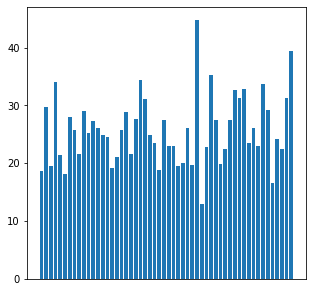

In [236]:
plt.figure(figsize=(5,5))
plt.bar(regional_values.index,regional_values['Price Variation as a % of average price'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [237]:
# Regional values with the highest variation in prices

regional_values['Price Variation as a % of average price'].sort_values(ascending=False)[:10]

PhoenixTucson       44.778331
WestTexNewMexico    39.399731
Portland            35.214468
LasVegas            34.322702
Boise               33.966260
Spokane             33.617018
Seattle             32.773865
SanDiego            32.646452
SanFrancisco        31.336373
West                31.322194
Name: Price Variation as a % of average price, dtype: float64